# Feature Engineering and Polynomail Regression :

### the aim :

we will explore the feature enginnering that help us to change the parameters in linear regression , also to increase the accurency of the model 

### Importing the libraries : 


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import copy 
import math

In [51]:
# reduced display precison on numpy arrays :
np.set_printoptions(precision=2)

In standard linear regression, the model assumes a linear relationship between the input features and the target variable. This means that the algorithm finds the * best linear combination * of the input features to predict the target. However, in many real-world scenarios, relationships between variables are non-linear, meaning a straight line won’t accurately represent the data.

For example, the price of a house may not increase in a simple straight-line manner as the living area increases. It might rise sharply for small increases in size, level off for medium sizes, and then increase again at a different rate for very large houses.

To handle this, we can use polynomial regression, a form of linear regression where we transform the original input features into higher-order polynomials (e.g., squares, cubes...). By doing this, we can still use the linear regression algorithm, but it will fit more complex, non-linear relationships.

#### Feature Engineering and Polynomial Features:
Instead of just using the input features as they are, we create new features that are powers or combinations of the original features.


In summary, polynomial regression is a technique that allows us to use linear regression machinery to fit non-linear data by transforming the original features into polynomial terms. This is done through feature engineering, which can significantly improve the model's performance on complex datasets.








#### we will strat with quadratic polynome :  1 + x2

In [52]:
# call the linear regression functions :

In [53]:
# cost function :
def cost_function(X, Y, W, b):
    '''
    X: the data without the target varaible
    Y: the target varaible
    W: the prameter (vector !)
    b: the second parameter 
    return: the cost !
    '''
    n = X.shape[0]
    m = X.shape[1]
    cost = 0
    for i in range(n):
        cost += ((X[i].dot(W) + b) - Y[i]) ** 2

    cost *= (1/(2*n))
    return cost

In [54]:
# compute gradient :
def compute_gradient(X, Y, W, b):
    '''
    X : the data without target variable
    Y : the data related to the target varaible
    W : the first vector parameter
    b : the second parameter 
    return :
           a list that conteint the partial DR
    '''
    n = X.shape[0]
    m = X.shape[1]
    dj_w = np.zeros((m,))
    dj_b = 0

    for i in range(n):
        for j in range(m):
            dj_w[j] += (1/ n) * (((X[i].dot(W) + b) - Y[i]) * X[i][j])
        dj_b += (1/n) * ((np.dot(X[i], W) + b) - Y[i])

    return dj_w, dj_b

In [55]:
#gradient descent :
def gradient_descent(X, Y, w_in, b_in, alpha, num_iter, compute_gradient, cost_function):
    '''
    X: the data without target varaible
    Y: the data related to the target varaible
    w_in : the first parameter initialisation
    b_in : the seconde parameter initialisation
    alpha : the rate learning 
    num_iter : the number of itertions in the algo
    compute_gradient : the function that calculate the partial derivations
    const_function : the function that calculate the cost of each parameters
    return :
            the best parameters that optimazing the cost function (the same thing of one variable !!)
    '''
    n = X.shape[0]
    m = X.shape[1]
    hist = {}
    hist["cost"] = [];
    hist["params"] = [];
    hist["grads"] = [];
    hist["iter"] = [];
    w = copy.deepcopy(w_in)
    b = b_in

    save_interval = np.ceil(num_iter/ 10000)
    print( f" Iteration    Cost          w0      b      djdw0    djdb ")
    print(f"----------- |----------|--------|--------|--------|--------|")

    for i in range(num_iter):
        dj_w, dj_b = compute_gradient(X, Y, w, b)

        w = w - alpha * (dj_w)
        b = b - alpha * (dj_b)

        if i == 0 or i % save_interval == 0:
            hist["cost"].append(cost_function(X, Y, w, b))
            hist["params"].append([w, b])
            hist["grads"].append([dj_w, dj_b])
            hist["iter"].append(i)


        if i % (math.ceil(num_iter / 10)) == 0 :
            cst = cost_function(X, Y, w, b)
            print(f"{i:9d} {cst:0.5e} {w[0]: 0.1e} {b: 0.1e} {dj_w[0]: 0.1e}{dj_b: 0.1e}")

    return w, b, hist

In [56]:
# run the gradient descent :
def run_descent(X, Y, iter = 1000, alpha=1e-6):
    n, m = X.shape
    w_in = np.zeros(m)
    b_in = 0
    w_out, b_out, hist_out = gradient_descent(X, Y, w_in, b_in, alpha, iter, compute_gradient, cost_function)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.2f}")
    return (w_out, b_out)

### starting ....

 Iteration    Cost          w0      b      djdw0    djdb 
----------- |----------|--------|--------|--------|--------|
        0 1.65756e+03  1.8e+01  1.2e+00 -1.8e+03-1.2e+02
      100 6.94549e+02  1.6e+01 -1.2e+01 -9.0e-01 1.2e+01
      200 5.88475e+02  1.6e+01 -2.3e+01 -6.9e-01 8.9e+00
      300 5.26414e+02  1.7e+01 -3.1e+01 -5.3e-01 6.8e+00
      400 4.90103e+02  1.7e+01 -3.6e+01 -4.0e-01 5.2e+00
      500 4.68858e+02  1.8e+01 -4.1e+01 -3.1e-01 4.0e+00
      600 4.56428e+02  1.8e+01 -4.5e+01 -2.4e-01 3.1e+00
      700 4.49155e+02  1.8e+01 -4.7e+01 -1.8e-01 2.3e+00
      800 4.44900e+02  1.8e+01 -4.9e+01 -1.4e-01 1.8e+00
      900 4.42411e+02  1.9e+01 -5.1e+01 -1.1e-01 1.4e+00
w,b found by gradient descent: w: [18.7], b: -52.08


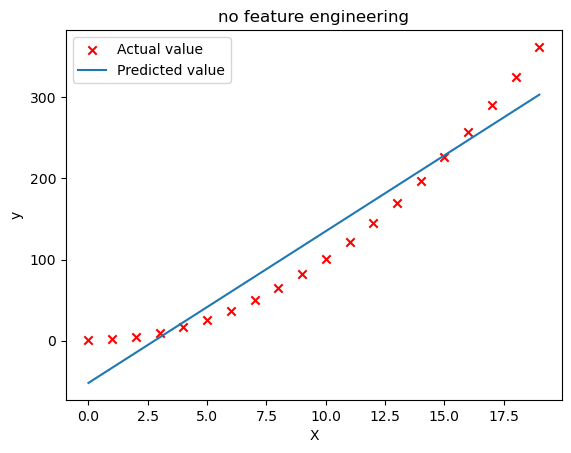

In [57]:
# creating a target data:
X = np.arange(0, 20, 1)
Y = 1 + X ** 2
X_train = X.reshape(-1, 1)
w_fi, b_fin = run_descent(X_train, Y, iter=1000, alpha=1e-2)

# ploting :
plt.scatter(X, Y, marker='x', c='r', label='Actual value')
plt.title('no feature engineering')
plt.plot(X, np.dot(X_train, w_fi) + b_fin,label='Predicted value')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

 Iteration    Cost          w0      b      djdw0    djdb 
----------- |----------|--------|--------|--------|--------|
        0 7.32922e+03  2.8e-01  1.2e-03 -2.8e+04-1.2e+02
     1000 2.24844e-01  1.0e+00  9.0e-03  2.0e-03-4.5e-01
     2000 2.22795e-01  1.0e+00  1.3e-02  2.0e-03-4.5e-01
     3000 2.20764e-01  1.0e+00  1.8e-02  2.0e-03-4.5e-01
     4000 2.18752e-01  1.0e+00  2.2e-02  2.0e-03-4.5e-01
     5000 2.16758e-01  1.0e+00  2.7e-02  2.0e-03-4.5e-01
     6000 2.14782e-01  1.0e+00  3.1e-02  1.9e-03-4.4e-01
     7000 2.12824e-01  1.0e+00  3.6e-02  1.9e-03-4.4e-01
     8000 2.10884e-01  1.0e+00  4.0e-02  1.9e-03-4.4e-01
     9000 2.08962e-01  1.0e+00  4.5e-02  1.9e-03-4.4e-01
w,b found by gradient descent: w: [1.], b: 0.05


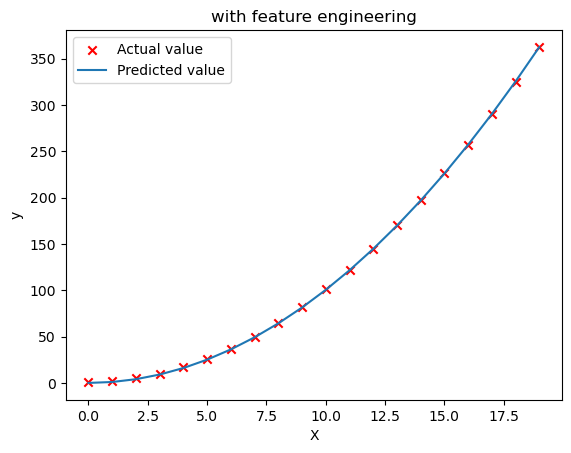

In [58]:
##### adding the power of x
X1 = np.arange(0, 20, 1)
Y1 = 1 + X1 ** 2
# feature engineering
X_train1 = X1 ** 2
X_train1 = X_train1.reshape(-1, 1)
w1_fi, b1_fi = run_descent(X_train1, Y1, iter=10000, alpha=1e-5)
# ploting :
plt.scatter(X1, Y1, marker='x', c='r', label='Actual value')
plt.title('with feature engineering')
plt.plot(X1, np.dot(X_train1, w1_fi) + b1_fi,label='Predicted value')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Adding some caracteristique :


(20, 3)
 Iteration    Cost          w0      b      djdw0    djdb 
----------- |----------|--------|--------|--------|--------|
        0 1.14029e+03  1.8e-04  1.2e-05 -1.8e+03-1.2e+02
     1000 3.28539e+02  1.2e-02  1.5e-03 -1.1e+02-1.4e+01
     2000 2.80443e+02  2.2e-02  2.8e-03 -1.0e+02-1.3e+01
     3000 2.39389e+02  3.2e-02  4.1e-03 -9.4e+01-1.2e+01
     4000 2.04344e+02  4.1e-02  5.3e-03 -8.7e+01-1.1e+01
     5000 1.74430e+02  4.9e-02  6.3e-03 -8.0e+01-1.0e+01
     6000 1.48896e+02  5.7e-02  7.3e-03 -7.4e+01-9.5e+00
     7000 1.27100e+02  6.4e-02  8.2e-03 -6.8e+01-8.8e+00
     8000 1.08495e+02  7.1e-02  9.1e-03 -6.3e+01-8.1e+00
     9000 9.26132e+01  7.7e-02  9.8e-03 -5.8e+01-7.5e+00
w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.01


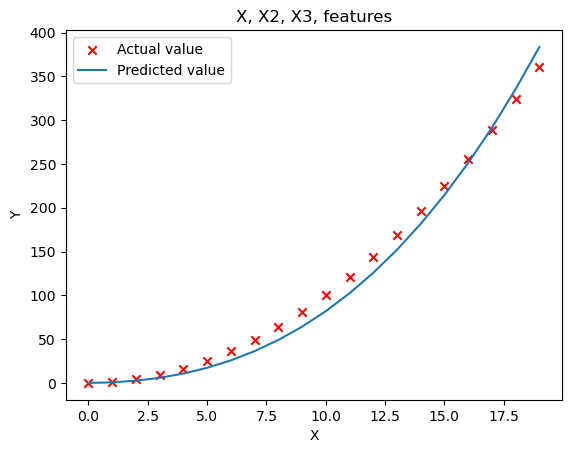

In [60]:
X2 = np.arange(0, 20, 1)
Y2 = X2 ** 2
# features eng:
X_train2 = np.c_[X2, X2 ** 2, X2 ** 3]
print(X_train2.shape)
w2, b2 = run_descent(X_train2, Y2, iter=10000, alpha=1e-7)
plt.scatter(X2, Y2, marker='x', c='r', label='Actual value')
plt.title('X, X2, X3, features')
plt.plot(X2, np.dot(X_train2, w2) + b2, label='Predicted value')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

so the interpretation of this is the most parameter that have a good relationship is the second w2 ==> so the feature X ** 2 is the moste one !

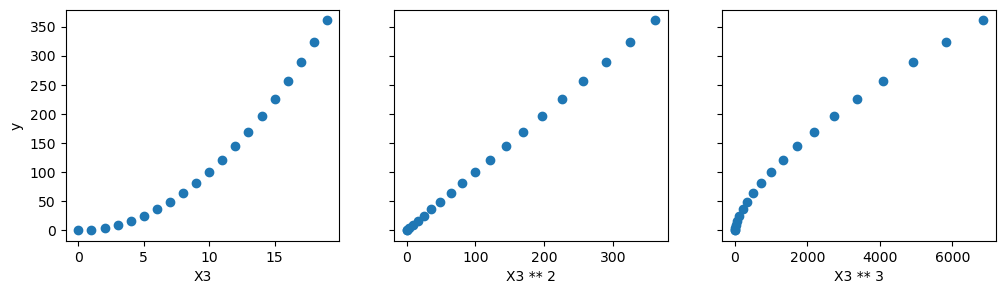

In [61]:
# let's ploting every feature 
X3 = np.arange(0, 20, 1)
Y3 = X3 ** 2
X_t = np.c_[X3, X3 ** 2, X3 ** 3]
X_f = ['X3', 'X3 ** 2', 'X3 ** 3']

figure, axe = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(axe)):
    axe[i].scatter(X_t[:, i], Y3)
    axe[i].set_xlabel(X_f[i])
axe[0].set_ylabel("y")
plt.show()

#### ==> we have the x ** 2 is similar to the function of Y (target variable)

### Obligatory : normalization ==> Z score normalisation

In [62]:
def Z_score_normalisation (X):
    '''
    the features that you will nromalise
    return :
          the normalized feature 
    '''
    meaN = np.mean(X, axis=0)
    segma = np.std(X, axis=0)
    X_norm = (X - meaN) / segma
    return X_norm

In [64]:
X8 = np.arange(0, 20, 1)
X_t8 = np.c_[X8, X8 ** 2, X8 ** 3]

print(f"Peak to Peak range by column in Raw X:{np.ptp(X_t8,axis=0)}")   # the difference between tne max and min
# add mean_normalization
X_nor = Z_score_normalisation(X_t8)
print(f"Peak to Peak range by column in Raw X:{np.ptp(X_nor,axis=0)}")

Peak to Peak range by column in Raw X:[  19  361 6859]
Peak to Peak range by column in Raw X:[3.3  3.18 3.28]


 Iteration    Cost          w0      b      djdw0    djdb 
----------- |----------|--------|--------|--------|--------|
        0 9.42147e+03  1.1e+01  1.2e+01 -1.1e+02-1.2e+02
    10000 3.90938e-01  7.7e+00  1.2e+02  1.0e-02-5.9e-14
    20000 2.78389e-02  2.0e+00  1.2e+02  2.7e-03-5.6e-14
    30000 1.98242e-03  5.5e-01  1.2e+02  7.2e-04-5.5e-14
    40000 1.41169e-04  1.5e-01  1.2e+02  1.9e-04-5.5e-14
    50000 1.00527e-05  3.9e-02  1.2e+02  5.1e-05-6.0e-14
    60000 7.15855e-07  1.0e-02  1.2e+02  1.4e-05-5.4e-14
    70000 5.09763e-08  2.8e-03  1.2e+02  3.7e-06-5.3e-14
    80000 3.63004e-09  7.4e-04  1.2e+02  9.8e-07-5.5e-14
    90000 2.58497e-10  2.0e-04  1.2e+02  2.6e-07-5.6e-14
w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.50


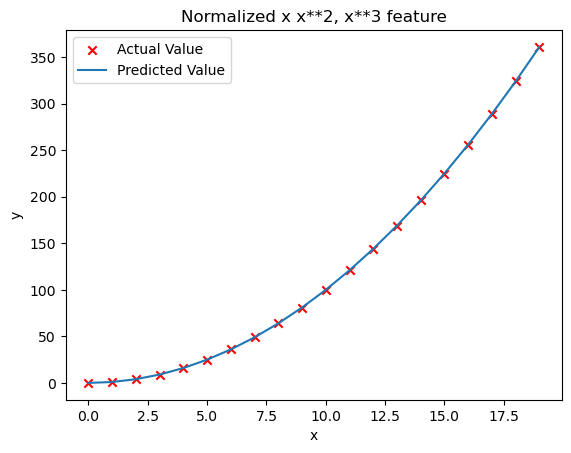

In [65]:
# train the model :
X = np.arange(0, 20, 1)
Y = X ** 2
X_train = np.c_[X, X ** 2, X **3]
X_normalized = Z_score_normalisation(X_train)

w_a, b_a = run_descent(X_normalized,Y , iter=100000, alpha=1e-1)

# ploting
plt.scatter(X, Y, marker='x', c='r', label="Actual Value");
plt.title("Normalized x x**2, x**3 feature")
plt.plot(X,X_normalized@w_a + b_a, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

 Iteration    Cost          w0      b      djdw0    djdb 
----------- |----------|--------|--------|--------|--------|
        0 2.24887e-01 -1.7e-02 -7.3e-04  1.7e-01 7.3e-03
   100000 2.31061e-02 -4.3e+00 -7.3e-03 -4.4e-05-1.3e-16
   200000 1.83619e-02 -3.9e+00 -7.3e-03 -4.7e-05 4.1e-16
   300000 1.47950e-02 -3.4e+00 -7.3e-03 -4.1e-05 1.9e-16
   400000 1.21114e-02 -3.0e+00 -7.3e-03 -3.5e-05-2.6e-16
   500000 1.00914e-02 -2.7e+00 -7.3e-03 -3.1e-05 2.4e-16
   600000 8.57025e-03 -2.4e+00 -7.3e-03 -2.7e-05-2.1e-15
   700000 7.42385e-03 -2.2e+00 -7.3e-03 -2.3e-05 1.1e-15
   800000 6.55908e-03 -2.0e+00 -7.3e-03 -2.0e-05 1.5e-15
   900000 5.90594e-03 -1.8e+00 -7.3e-03 -1.7e-05-2.6e-16
w,b found by gradient descent: w: [-1.61e+00 -1.01e+01  3.00e+01 -6.92e-01 -2.37e+01 -1.51e+01  2.09e+01
 -2.29e-03 -4.69e-03  5.51e-02  1.07e-01 -2.53e-02  6.49e-02], b: -0.01


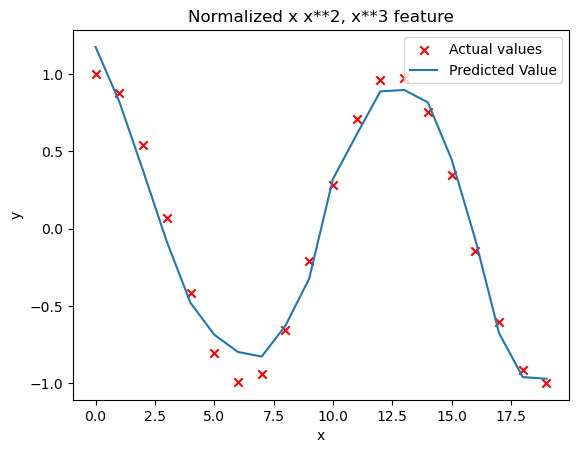

In [71]:
# complex functions :
X = np.arange(0, 20, 1)
Y = np.cos(X / 2)

X_train = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10, X**11, X**12, X**13]
X_train = Z_score_normalisation(X_train)

w, b = run_descent(X_train, Y, iter=1000000, alpha=1e-1)

plt.scatter(X, Y, marker='x', c='r', label='Actual values')
plt.title("Normalized x x**2, x**3 feature")
plt.plot(X,X_train@w + b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
### the end of the subject !!!!>>>>>>